Install profiling
https://github.com/ydataai/ydata-profiling

In [ ]:
!pip install ydata-profiling
!pip install --upgrade typing-extensions

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

## Load Data

In [2]:
################################################################################
## TODO: load and display dataframe
################################################################################

df = pd.read_csv('./content/Heart_Disease_Dataset.csv')
df


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


## Explore data with ProfileReport
https://github.com/ydataai/ydata-profiling

In [3]:
################################################################################
## TODO: Use profiler to explore data
################################################################################

profile = ProfileReport(df, title='Profiling Report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Explore data by Panda

Dataset shape: (1190, 12)
----------------------
Missing Entries:
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64
There are 0 missing entries
----------------------
There are 629 positive and 561 negative cases
--------------------- Plots --------------------------


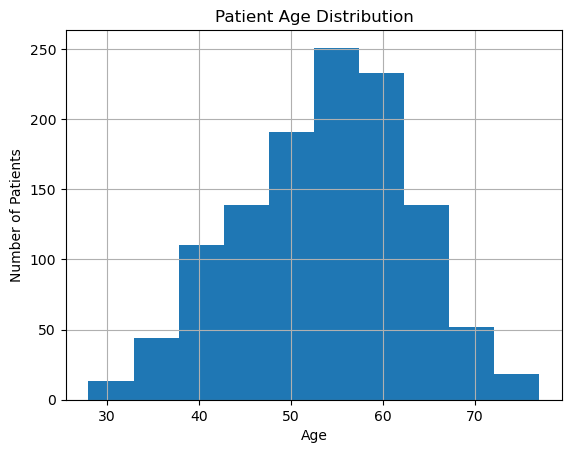

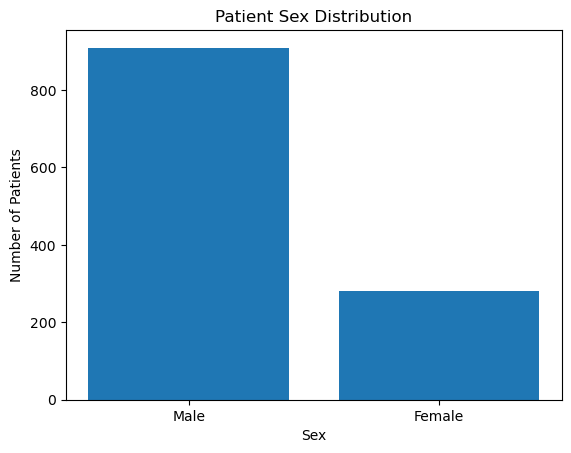

In [44]:
#############################################################################
## TODO: Find the shape of the dataset.
#############################################################################
print('Dataset shape: {}'.format(df.shape))
print('----------------------')

#############################################################################
## TODO: Check if there are missing entries in the dataset columnwise.
#############################################################################
print('Missing Entries:')
print(df.isnull().sum())
print('There are {} missing entries'.format(df.isnull().sum().sum()))
print('----------------------')

#############################################################################
## TODO: Check number of positive and negative cases
#############################################################################
positive_case_count = df['target'].value_counts()[1]
negative_case_count = df['target'].value_counts()[0]
print('There are {} positive and {} negative cases'.format(positive_case_count,negative_case_count))

#############################################################################
## TODO: plot  age distribution and gender distribution for both normal
## and heart disease patients. (2*2 plots)
#############################################################################
print("--------------------- Plots --------------------------")

df['age'].hist()
plt.title('Patient Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

sex_distribution = {'Male':df['sex'].value_counts()[1], 'Female':df['sex'].value_counts()[0]}
plt.bar(list(sex_distribution.keys()), list(sex_distribution.values()))
plt.title('Patient Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Number of Patients')
plt.show()




## Split Data for testing and training ML models

In [349]:
from sklearn.model_selection import train_test_split
#############################################################################
## TODO: split dataframe into 4 dataframe X_train, X_test, y_train, y_test
## test(30%) train(70%)
# Assuming df is your DataFrame and 'target_column' is your target variable
# Split the data into training and testing sets with 0.7 to 0.3 ratio
#############################################################################
X = df.iloc[:, : 11]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Feature Engineering

In [205]:
from sklearn.preprocessing import StandardScaler
#############################################################################
## TODO: Normalize numerical features
## Note that just numerical fetures should be normalized.
## Type of features is determined in dataset description file.
# Create a StandardScaler instance
# Fit to numerical columns of train and transform test and train based on this
## Warning:
## You can't fit your Scaler on whole data. Fit should be just on Train data.
# Print the first few rows to check the result
#############################################################################
numerical_columns = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
scaler = StandardScaler()
X_train_fit = scaler.fit(X_train[numerical_columns])
X_train[numerical_columns] = X_train_fit.transform(X_train[numerical_columns])
X_test[numerical_columns] = X_train_fit.transform(X_test[numerical_columns])

X_train.head()


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
996,-1.566106,1,4,-0.757118,0.070043,0,0,-0.024287,0,0.288497,2
852,0.877897,0,4,1.522053,-0.496223,0,2,0.176820,0,4.894054,3
478,0.771636,1,4,-1.191245,-2.184727,1,0,-1.311377,1,1.025386,3
1004,-1.991150,0,4,0.328202,-0.300604,0,0,1.665018,0,0.472719,1
875,1.090419,1,3,0.436733,1.264351,0,0,0.699701,0,-0.816837,1


### plot correlations

<AxesSubplot:>

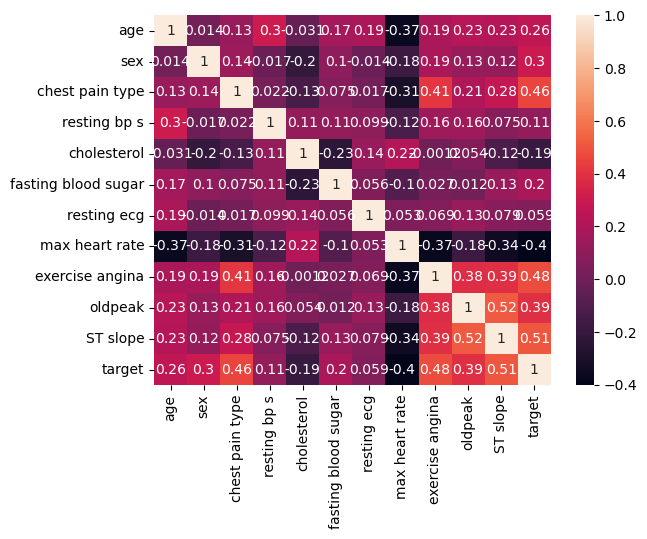

In [180]:
#############################################################################
## TODO: Make a temp dataframe with X_train and y_train.
## plot correlation between all features
#############################################################################
temp_df = X_train.copy()
temp_df['target'] = y_train
sns.heatmap(temp_df.corr(), annot=True) # get correlation matrix from the dataframe and pass into sns.heatmap()



## Define a classification report function


In [275]:
#############################################################################
## TODO: Create a personal classification report with some numerical analysis
#############################################################################

def classification_report(y_true, y_pred):


    """
    Calculate classification metrics based on true and predicted labels.

    Parameters:
    - y_true: Array of true labels (0 or 1).
    - y_pred: Array of predicted labels (0 or 1).

    Returns:
    - Accuracy: Ratio of correct predictions to total samples.
    - Precision: Accuracy of positive predictions among all predicted positives.
    - Recall: Ability to capture actual positives among all actual positives.
    - F1 Score: Harmonic mean of precision and recall, balancing both metrics.
    - FNR: Proportion of actual positives incorrectly predicted as negatives.
    """

################### Complete this part###############################
    true_pos_count = np.count_nonzero(y_true) # number of true positives
    
    pred_pos_count = np.count_nonzero(y_pred) # number of predicted positives
    pred_neg_count = len(y_pred) - pred_pos_count # number of predicted negatives
    
    false_pos_count = 0 # counter of false positive predictions
    false_neg_count = 0 # counter of false negative predictions
    
    for i in range(len(y_true)): # forloop to count false positives and negatives
        if y_pred[i] == 1: false_pos_count += 1 if y_true[i] != y_pred[i] else 0
        if y_pred[i] == 0: false_neg_count += 1 if y_true[i] != y_pred[i] else 0
        
    correct_pos_count = pred_pos_count - false_pos_count # number of correctly predicted positives
    correct_neg_count = pred_neg_count - false_neg_count # number of correctly predicted negatives
    
    
    Accuracy = (correct_pos_count + correct_neg_count) / len(y_pred)
    Precision = correct_pos_count / pred_pos_count
    Recall = correct_pos_count / true_pos_count
    F1score = (2*Precision*Recall) / (Precision+Recall)
    FNR = false_neg_count / true_pos_count
    

####################################################################


    result = {
        'Accuracy:' : Accuracy,
        'Precision:' : Precision,
        'Recall:' : Recall,
        'F1score:': F1score,
        'FNR:': FNR

    }

    return result


# Test function


# Test Case 1: Perfect predictions
y_true_1 = [1, 0, 1, 0]
y_pred_1 = [1, 0, 1, 0]
result_1 = classification_report(y_true_1, y_pred_1)
print(result_1)


# Test Case 2: Imperfect predictions
y_true_2 = [1, 0, 1, 0]
y_pred_2 = [0, 1, 1, 1]

result_2 = classification_report(y_true_2, y_pred_2)
print(result_2)



{'Accuracy:': 1.0, 'Precision:': 1.0, 'Recall:': 1.0, 'F1score:': 1.0, 'FNR:': 0.0}
{'Accuracy:': 0.25, 'Precision:': 0.3333333333333333, 'Recall:': 0.5, 'F1score:': 0.4, 'FNR:': 0.5}


## Model Traning

In [182]:
#############################################################################
## TODO: convert X_train, X_test, y_train, y_test to numpy arrays
#############################################################################
X_train_arr = X_train.to_numpy()
X_test_arr = X_test.to_numpy()
y_train_arr = y_train.to_numpy()
y_test_arr = y_test.to_numpy()

### Train Logistic Regression

{'Accuracy:': 0.8571428571428571, 'Precision:': 0.8725490196078431, 'Recall:': 0.8768472906403941, 'F1score:': 0.8746928746928747, 'FNR:': 0.12315270935960591}


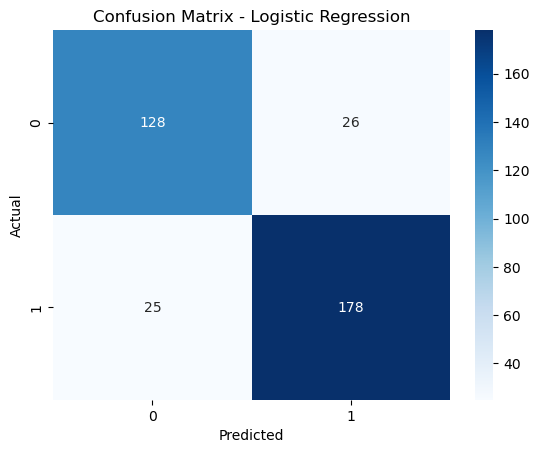

In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#############################################################################
## TODO: Train a Logistic Regression Model and test your model.
## give a test report from test result by above classification_report function
## Plot the confusion matrix using seaborn
#############################################################################
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train, y_train)
y_lr_pred = logistic_regression_model.predict(X_test)
print(classification_report(y_test_arr, y_lr_pred))
sns.heatmap(confusion_matrix(y_test_arr, y_lr_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Train KNN

{'Accuracy:': 0.8403361344537815, 'Precision:': 0.8443396226415094, 'Recall:': 0.8817733990147784, 'F1score:': 0.8626506024096386, 'FNR:': 0.11822660098522167}


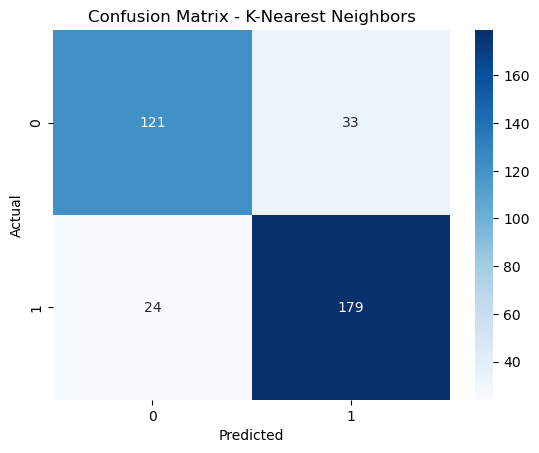

In [233]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

#############################################################################
## TODO: Train a KNN Model and test your model.
## give a test report from test result by above classification_report function
## plot confusion matrix
#############################################################################
knn_model = KNeighborsClassifier(n_neighbors=5) # k=5 chosen to start <- to be optimized
knn_model.fit(X_train, y_train)
y_knn_pred = knn_model.predict(X_test)
print(classification_report(y_test_arr, y_knn_pred))
sns.heatmap(confusion_matrix(y_test_arr, y_knn_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



### Train a safer model

To make sure our model doesn't make dangerous mistakes, like saying a high-risk patient is healthy, we can use the class_weight option in LogisticRegression(). If the model wrongly thinks a healthy person is high-risk, it's not as big of a problem and doctors will check it!

{'Accuracy:': 0.8571428571428571, 'Precision:': 0.8762376237623762, 'Recall:': 0.8719211822660099, 'F1score:': 0.8740740740740741, 'FNR:': 0.12807881773399016}


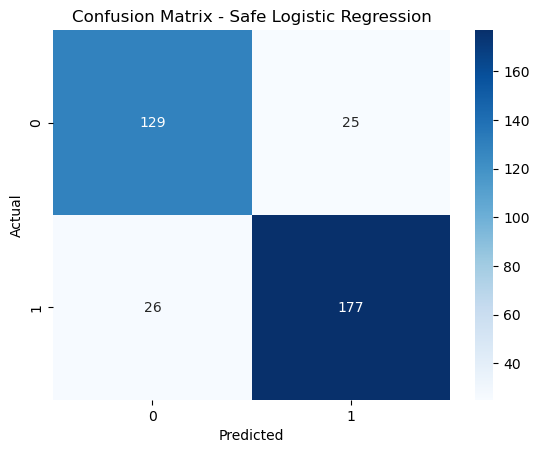

In [232]:
#############################################################################
## TODO: create a safer model with class_weight use your owen weight result is not important
## plot confusion matrix
#############################################################################
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve

logistic_regression_model = LogisticRegression(random_state=42, class_weight='balanced')
logistic_regression_model.fit(X_train, y_train)
y_lr_pred = logistic_regression_model.predict(X_test)
print(classification_report(y_test_arr, y_lr_pred))
sns.heatmap(confusion_matrix(y_test_arr, y_lr_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Safe Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




### Cross Validation Score

In [254]:
from sklearn.model_selection import cross_validate
#############################################################################
## TODO: research  about "K-Fold cross validation"
## cross validate your KNN model to evaluate your model better
## use accuracy and recall to report cross validation results
#############################################################################
cv_accuracy_result = cross_validate(knn_model, X_train, y_train, scoring='accuracy') # will by default use 5 folds
cv_recall_result = cross_validate(knn_model, X_train, y_train, scoring='recall') # will by default use 5 folds

avg_accuracy = np.average(cv_accuracy_result['test_score'])
avg_recall = np.average(cv_recall_result['test_score'])

print('KNN Acc: {}'.format(avg_accuracy))
print('KNN Recall: {}'.format(avg_recall))


KNN Acc: 0.8415265853834499
KNN Recall: 0.8473871409028728


### Hyperparameter Tuning Using GridSearchCV

In [310]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#############################################################################
## TODO: Explore GridSearchCV functionality to identify the best parameters
## (n_neighbors, weights, p) for your KNN model.
#############################################################################
k_values = list(range(1,40))
weight_values = ['uniform', 'distance']
grid = GridSearchCV(knn_model, dict(n_neighbors=k_values, weights=weight_values, p=[1,2]), cv=5, scoring='accuracy', return_train_score=False) 



In [311]:
#############################################################################
## TODO: Retrieve the best model and its parameters
#############################################################################
grid.fit(X_train, y_train)
print('Best Parameters: {}'.format(grid.best_params_))
print('Best accuracy: {}'.format(grid.best_score_))


Best Parameters: {'n_neighbors': 14, 'p': 1, 'weights': 'distance'}
Best accuracy: 0.9135632349758314


### Cross Validation Score on Result of Grid Search

In [312]:
#############################################################################
## TODO: Do again "K-Fold cross validation" on best KNN model of the Grid Search
#############################################################################
best_knn_model = KNeighborsClassifier(n_neighbors=14, weights='distance', p=1)

cv_accuracy_result = cross_validate(best_knn_model, X_train, y_train, scoring='accuracy') # 5 folds (default)
cv_recall_result = cross_validate(best_knn_model, X_train, y_train, scoring='recall') # 5 folds (default)

avg_accuracy = np.average(cv_accuracy_result['test_score'])
avg_recall = np.average(cv_recall_result['test_score'])

print('KNN Acc: {}'.format(avg_accuracy))
print('KNN Recall: {}'.format(avg_recall))


KNN Acc: 0.9135632349758314
KNN Recall: 0.9130506155950753


### Is the aforementioned KNN model (Best KNN) fair?
Evaluate that model perform equally on men and women or not.

In [363]:
#############################################################################
## TODO: split your test data on two split of women and men and give
## classification_report on them.
#############################################################################
y_test_men = []
y_test_women = []
for i,r in X_test.iterrows():
    if r['sex']==1: y_test_men.append(y_test[i])
    else: y_test_women.append(y_test[i]) 
X_test_men = X_test.loc[X_test['sex']==1]
X_test_women = X_test.loc[X_test['sex']==0]

best_knn_model.fit(X_train, y_train)
y_pred_men = best_knn_model.predict(X_test_men)
y_pred_women = best_knn_model.predict(X_test_women)

print('Performance of best KNN model for sex_group of \'{}\':'.format(0.0))
print(classification_report(y_test_women, y_pred_women))
print('Performance of best KNN model for sex_group of \'{}\':'.format(1.0))
print(classification_report(y_test_men, y_pred_men))


Performance of best KNN model for sex_group of '0.0':
{'Accuracy:': 0.918918918918919, 'Precision:': 0.8, 'Recall:': 0.8888888888888888, 'F1score:': 0.8421052631578948, 'FNR:': 0.1111111111111111}
Performance of best KNN model for sex_group of '1.0':
{'Accuracy:': 0.8445229681978799, 'Precision:': 0.8810810810810811, 'Recall:': 0.8810810810810811, 'F1score:': 0.8810810810810811, 'FNR:': 0.11891891891891893}
